**The Data Science Method**


1.   [Problem Identification](https://medium.com/@aiden.dataminer/the-data-science-method-problem-identification-6ffcda1e5152)

2.   [Data Wrangling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-data-collection-organization-and-definitions-d19b6ff141c4)
  * Data Collection - Collected data from wikipedia and quandl wiki price dataset. The wikipedia showed us the currect S&P 500 companies and used their ticker symbols to query quandl wiki prices.
  * Data Organization - Done using cookiecutter
  * Data Definition
  * Data Cleaning - The S&P 500 data from quandls wiki price is clean and ready for analysis use but has lost its support from Quandl community as of April 11, 2018. So we will use this dataset to setup the protfolio optimizer with proof of concept then use a different data source later for cost efficiencies.

3.   [**Exploratory Data Analysis**](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9)
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   [Pre-processing and Training Data Development](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967)
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   [Modeling](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b)
  * Create dummy or indicator features for categorical variable
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   [Documentation](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-documentation-c92c28bd45e6)

  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code
  * Finalize Documentation


First, loads the needed packages and modules into Python. Then loads the data into a pandas dataframe for ease of use.

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# import quandl
import pandas as pd 
import numpy as np
from scipy.stats import norm
import pypfopt



import dotenv
import os

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline



In [2]:
# prints current directory
current_dir = os.getcwd()
print("Current Directory: ")
print(current_dir)

Current Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt/notebooks/exploratory


In [3]:
# prints parent directory
project_dir = os.path.abspath(os.path.join(os.path.join(current_dir, os.pardir), os.pardir))
print("Parent Directory: ")
print(project_dir)

Parent Directory: 
/Users/jb/Development/courses/springboard/ds/Assignments/Portfolio-Optimization/portopt


In [4]:
print(os.listdir())

['3.0-jujbates-S&P500-PO_eda.ipynb', '.DS_Store', '.ipynb_checkpoints', '3.0-jujbates-S&P500-PO_eda1.ipynb', '2.0-jujbates-S&P500-PO_data_wrangling.ipynb']


In [5]:
plt.style.use('dark_background')
c = ['white', 'springgreen', 'fuchsia', 'lightcoral', 'red'] # Color
s = [24, 20, 16, 12]  # Size
w = [0.75, 1, 1.25, 1.50] # Line Width
ga = 0.10 # Grid Alpha

In [6]:
# sp_df = pd.read_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_adj_close_interim.csv', index_col=['date'])

# sp_wiki_df =  pd.read_csv(project_dir + '/data/interim/'+ 'wiki_sp500_interim.csv', index_col=['Symbol'])
# sp_slick_df = pd.read_csv(project_dir + '/data/interim/'+ 'slick_sp500_interim.csv', index_col=['#'])


wiki_df = pd.read_csv(project_dir + '/data/raw/'+ 'wiki_sp500_raw.csv', index_col=['index'])
slick_df = pd.read_csv(project_dir + '/data/interim/'+ 'slick_sp500_interim.csv', index_col=['#'])
sp500_adj_close_df = pd.read_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_adj_close_interim.csv', index_col=['date'])
sp500_shares_outstanding_df = pd.read_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_shares_outstanding_interim.csv', index_col=['symbol'])
sp500_index_adj_close_df = pd.read_csv(project_dir + '/data/interim/'+ 'yahoo_sp500_index_adj_close_interim.csv', index_col=['date'])


In [7]:
sp500_adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-01-02 to 2019-12-31
Columns: 495 entries, F to NVR
dtypes: float64(495)
memory usage: 976.5+ KB


In [8]:
slick_df

,Company,Symbol,Weight,Price,Chg,% Chg
#,,,,,,
1,Apple Inc.,AAPL,6.499271,115.09,0.05,(0.04%)
2,Microsoft Corporation,MSFT,5.679779,217.00,0.77,(0.36%)
3,Amazon.com Inc.,AMZN,4.723456,3215.00,10.60,(0.33%)
4,Facebook Inc. Class A,FB,2.335458,286.30,1.51,(0.53%)
5,Alphabet Inc. Class A,GOOGL,1.686059,1636.50,3.52,(0.22%)
...,...,...,...,...,...,...
501,HollyFrontier Corporation,HFC,0.010314,20.39,0.00,(0.00%)
502,TechnipFMC Plc,FTI,0.010055,6.47,0.00,(0.00%)
503,Under Armour Inc. Class A,UAA,0.008978,14.66,0.00,(0.00%)


In [9]:
wiki_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
index,,,,,,,,,
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [10]:
sp500_adj_close_df.index

Index(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=252)

In [11]:
sp500_adj_close_df.index = pd.to_datetime(sp500_adj_close_df.index)
sp500_adj_close_df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [12]:
sp500_adj_close_df.head()

,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,SHW,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,7.157524,8.515582,7.677559,10.135902,11.040720,11.260846,11.111471,10.589853,13.518568,12.624404,...,385.904297,466.029999,443.359985,546.039978,838.479980,1045.849976,1054.680054,1539.130005,1721.699951,2420.820068
2019-01-03,7.048802,8.515582,7.687096,9.852178,10.934093,11.115358,11.019942,10.388566,13.435747,12.361787,...,374.255188,450.239990,439.450012,513.559998,845.580017,1016.059998,1025.469971,1500.280029,1663.119995,2381.939941
2019-01-04,7.320606,8.515582,7.849231,10.585953,11.409068,11.600322,11.331138,10.824686,13.849862,12.943297,...,384.172607,471.679993,455.000000,527.150024,835.630005,1070.709961,1078.069946,1575.390015,1717.550049,2412.830078
2019-01-07,7.510870,8.698713,8.335636,10.762061,11.612627,11.833104,11.376903,10.807912,13.895874,13.196535,...,389.593781,478.440002,485.149994,533.580017,822.320007,1068.390015,1075.920044,1629.510010,1711.819946,2471.010010
2019-01-08,7.583352,8.643772,8.163962,10.957734,11.787107,11.949494,11.486736,10.947694,13.941887,12.943297,...,392.358490,482.989990,497.369995,556.530029,811.369995,1076.280029,1085.369995,1656.579956,1686.920044,2494.959961


In [13]:
sp500_adj_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Columns: 495 entries, F to NVR
dtypes: float64(495)
memory usage: 976.5 KB


### Plot S&P 500 Adj Close Prices in  GICS Sectors and/or Sub Sector

In [14]:
ALL = 'SELECT ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique


In [15]:
tickers = None

In [16]:

def _plot_tickers(ax, df, background_tickers, focus_tickers, legend=True, title=None, ylabel=None):
    ax.set_title(title, fontsize=s[1])
    ax.set_ylabel(ylabel, fontsize=s[2])
 
    for i in range(len(focus_tickers)):
        ax.plot(df.index.values, df[focus_tickers[i]], label=focus_tickers[i], linewidth=w[3], color=c[2])
    
    if background_tickers is not None:  
        for i in focus_tickers:
            background_tickers.remove(i)
            
#         if 10 >= len(background_tickers) > 1:
        if len(background_tickers) <= 10 and len(background_tickers) > 1:
            for i in range(len(background_tickers)):
                ax.plot(df.index.values, df[background_tickers[i]], label=background_tickers[i],  linewidth=w[3], color=c[0], alpha=0.75)
        else:
            ax.plot(df.index.values, df[background_tickers], linewidth=w[3], color=c[0], alpha=0.75)
    
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Tickers', ncol=2)
    ax.grid(alpha=ga)


def plot_ticker_list(sector, sub_sector, ticker):

    background_tickers = None
    legend = True   
    if sector == 'SELECT ALL':
        legend = False
    else:
        if ticker != 'SELECT ALL' :
            if sub_sector == 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == sector]['Symbol'])
                background_tickers.remove('SELECT ALL')   
            elif sub_sector != 'SELECT ALL' : 
                background_tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == sub_sector]['Symbol'])
                background_tickers.remove('SELECT ALL')              
              
    fig, (ax1) = plt.subplots(1, figsize=(20, 10))
    
    _plot_tickers(ax1, sp500_adj_close_df, background_tickers, tickers, legend=legend, 
                  title=f"S&P 500 Stocks\nSector: {sector} \n Sub Industry: {sub_sector} \n Tickers: {ticker}",
                    ylabel=f"Price")
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()

    
    
def select_ticker_list(ticker):

    global tickers
    
    if ticker != 'SELECT ALL':        
        tickers = [dropdown_ticker.value]
    else:
        if dropdown_sector.value != 'SELECT ALL':
            if dropdown_sub_sector.value == 'SELECT ALL':
                tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
            elif dropdown_sub_sector.value != 'SELECT ALLf':
                tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
                tickers.remove('SELECT ALL')
        else:
            tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
            tickers.remove('SELECT ALL')
    return tickers


def get_ticker(sub_sector):
    global tickers

    if sub_sector != 'SELECT ALL':
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sub-Industry"] == dropdown_sub_sector.value]['Symbol'])
    else:
        dropdown_ticker.options = unique_sorted_values_plus_ALL(
            wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']
        )
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    tickers.remove('SELECT ALL')


def get_sub_sector(sector):   
    global tickers

    dropdown_sub_sector.options = unique_sorted_values_plus_ALL(
        wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']
    )
    get_ticker(dropdown_sub_sector.value)
    if  dropdown_sector.value != 'SELECT ALL':
        tickers = unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol'])
    else:
        tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
    tickers.remove('SELECT ALL')


dropdown_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df['GICS Sector']),
        description='GICS Sector:'
)

dropdown_sub_sector = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['GICS Sub-Industry']),
    description='Sub Sector:'
)

dropdown_ticker = widgets.Dropdown(
    options=unique_sorted_values_plus_ALL(wiki_df[wiki_df["GICS Sector"] == dropdown_sector.value]['Symbol']),
    description='Ticker:'
)

btn_plot = widgets.Button(description='Plot')


i = widgets.interactive(get_sub_sector, sector=dropdown_sector)
j = widgets.interactive(get_ticker, sub_sector=dropdown_sub_sector)
k = widgets.interactive(select_ticker_list, ticker=dropdown_ticker)

output_ticker = widgets.Output()

def btn_plot_event_handler(obj):
    output_ticker.clear_output()
    with output_ticker:
        plot_ticker_list(dropdown_sector.value, dropdown_sub_sector.value, dropdown_ticker.value)


display(i)
display(j)
display(k)

display(btn_plot)

btn_plot.on_click(btn_plot_event_handler)

tickers = unique_sorted_values_plus_ALL(wiki_df['Symbol'])
tickers.remove('SELECT ALL')



interactive(children=(Dropdown(description='GICS Sector:', options=('SELECT ALL', 'Communication Services', 'C…

interactive(children=(Dropdown(description='Sub Sector:', options=('SELECT ALL',), value='SELECT ALL'), Output…

interactive(children=(Dropdown(description='Ticker:', options=('SELECT ALL',), value='SELECT ALL'), Output()),…

Button(description='Plot', style=ButtonStyle())

In [17]:
display(output_ticker)

Output()

#### Total Overall Cumulative Returns

In [18]:
# Cumulative Return
def overall_cumulative_return(df):
    return (df.iloc[-1,:] / df.iloc[0,:]) - 1

sp500_overall_cumulative_return_df = overall_cumulative_return(sp500_adj_close_df)
sp500_overall_cumulative_return_df.head()

F       0.277604
AMCR    0.230817
GE      0.447578
FCX     0.289625
NWSA    0.259801
dtype: float64

#### Daily Returns

In [19]:
# Calculate daily percentage returns  
sp500_daily_returns_df = sp500_adj_close_df.pct_change() 
sp500_daily_returns_df.head()

,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,SHW,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.01519,0.000000,0.001242,-0.027992,-0.009658,-0.012920,-0.008237,-0.019008,-0.006126,-0.020802,...,-0.030187,-0.033882,-0.008819,-0.059483,0.008468,-0.028484,-0.027696,-0.025242,-0.034024,-0.016061
2019-01-04,0.03856,0.000000,0.021092,0.074478,0.043440,0.043630,0.028239,0.041981,0.030822,0.047041,...,0.026499,0.047619,0.035385,0.026462,-0.011767,0.053786,0.051294,0.050064,0.032728,0.012968
2019-01-07,0.02599,0.021505,0.061968,0.016636,0.017842,0.020067,0.004039,-0.001550,0.003322,0.019565,...,0.014111,0.014332,0.066264,0.012198,-0.015928,-0.002167,-0.001994,0.034353,-0.003336,0.024113
2019-01-08,0.00965,-0.006316,-0.020595,0.018182,0.015025,0.009836,0.009654,0.012933,0.003311,-0.019190,...,0.007096,0.009510,0.025188,0.043011,-0.013316,0.007385,0.008783,0.016612,-0.014546,0.009692


#### Mean Daily Returns for Each Stock

In [20]:
# Calculate individual mean returns for each stock
sp500_mean_daily_returns_df = sp500_daily_returns_df.mean()
sp500_mean_daily_returns_df.head()

F       0.001125
AMCR    0.000930
GE      0.001793
FCX     0.001369
NWSA    0.001021
dtype: float64

#### Standard Deviation of Daily Returns for Each Stock

In [21]:
# Calculate individual std of daily returns for each stock
sp500_std_daily_returns_df = sp500_daily_returns_df.std()
sp500_std_daily_returns_df.head()

F       0.017264
AMCR    0.014297
GE      0.025418
FCX     0.026587
NWSA    0.014191
dtype: float64

### Plot S&P 500 Adj Close Daily Return Histogram

In [35]:

def simpleMovingAverage(values_df, window):
    return values_df.rolling(window=window).mean()

def expMovingAverage(values_df, window):
    return pd.Series.ewm(values_df, span=window, adjust=False).mean()


def movingAverageConvergenceDivergence(values_df, window_1 = 12, window_2 = 26, macd_signal_window=9):
    ema12 = expMovingAverage(values_df, window_1)
    ema26 = expMovingAverage(values_df, window_2)
    macd = ema12 - ema26
    macd_signal = expMovingAverage(macd, macd_signal_window)
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

sp500_14_day_moving_average_df = simpleMovingAverage(sp500_adj_close_df, 14)
sp500_50_day_moving_average_df = simpleMovingAverage(sp500_adj_close_df, 50)

sp500_macd_df, sp500_macd_signal_df, sp500_macd_hist_df = movingAverageConvergenceDivergence(sp500_adj_close_df)


def plot_daily_return_hist(ticker):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20, 16))
    ax1.set_title(f"S&P 500 Stocks & SMA ({ticker})", fontsize=s[1])
    ax1.set_ylabel(f"Price", fontsize=s[2])
    ax1.plot(sp500_adj_close_df.index.values, sp500_adj_close_df[ticker], label='Adj. Close', linewidth=w[3], color=c[1])
    ax1.plot(sp500_14_day_moving_average_df.index.values, sp500_14_day_moving_average_df[ticker], label='14 Day SMA', linewidth=w[3], color=c[2])
    ax1.plot(sp500_50_day_moving_average_df.index.values, sp500_50_day_moving_average_df[ticker], label='50 Day SMA', linewidth=w[3], color=c[3])
    
    ax1.legend(loc='upper left', title = 'Tickers')
    ax1.grid(alpha=ga)
    
    
    ax2.set_title(f"MACD ({ticker})", fontsize=s[1])
    ax2.set_ylabel(f"Price", fontsize=s[2])
#     ax2.plot(sp500_adj_close_df.index.values, sp500_adj_close_df[ticker], label='Adj. Close', linewidth=w[3], color=c[1])
    ax2.plot(sp500_macd_df.index.values, sp500_macd_df[ticker], label='MACD', linewidth=w[3], color=c[2])
    ax2.plot(sp500_macd_signal_df.index.values, sp500_macd_signal_df[ticker], label='MACD Singnal', linewidth=w[3], color=c[3])
    
    ax2.legend(loc='upper left', title = 'Tickers')
    ax2.grid(alpha=ga)
    
    ax3.set_title(f"S&P 500 Stocks ({ticker})", fontsize=s[1])
    ax3.set_ylabel(f"Frequency", fontsize=s[2])
    
    ax3.hist(sp500_daily_returns_df[ticker], bins=100, label=ticker, linewidth=w[3], color=c[1])
    
    ax3.axvline(sp500_mean_daily_returns_df[ticker], color='red', linestyle='dashed', linewidth=2)
    
    # To plot the std lines we plot both the positive and negative values 
    ax3.axvline(sp500_std_daily_returns_df[ticker], color='g', linestyle='dashed', linewidth=2)
    ax3.axvline(-sp500_std_daily_returns_df[ticker], color='g', linestyle='dashed', linewidth=2)

    ax3.legend(loc='upper left', title = 'Tickers')
    ax3.grid(alpha=ga)
    
    plt.xticks(fontsize=s[3])
    plt.yticks(fontsize=s[3])
    plt.show()
    
    return 

interact(plot_daily_return_hist, 
         ticker=sp500_adj_close_df);




interactive(children=(Dropdown(description='ticker', options=('F', 'AMCR', 'GE', 'FCX', 'NWSA', 'NWS', 'HBAN',…

#### Expected Return - Annualised Mean Historical returns with compounding

In [23]:
# Calculate expected returns
sp500_stock_expected_returns_df = (1 + sp500_daily_returns_df).prod() ** (252 / sp500_daily_returns_df.count()) - 1

## Equal Weighted Portfolio

#### Define Weights for Equal Weighted Portfolio

In [24]:
# Define weights for the portfolio
weights = np.array([100 / sp500_adj_close_df.shape[1] for x in range(sp500_adj_close_df.shape[1])])
weights.sum()

100.0

### Portfolio Preformance

#### Expected Return - Annualised Mean Historical returns with compounding

In [25]:
sp500_ew_expected_returns = np.dot(weights, sp500_stock_expected_returns_df)
sp500_ew_expected_returns

32.42451343504416

#### Daily Portfolio Return

In [26]:
# Create mean daily portfolio returns column
sp500_ew_daily_returns_df = sp500_daily_returns_df.copy(deep=True)
sp500_ew_daily_returns_df['Portfolio'] = sp500_ew_daily_returns_df.dot(weights)
sp500_ew_daily_returns_df


,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR,Portfolio
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.015190,0.000000,0.001242,-0.027992,-0.009658,-0.012920,-0.008237,-0.019008,-0.006126,-0.020802,...,-0.033882,-0.008819,-0.059483,0.008468,-0.028484,-0.027696,-0.025242,-0.034024,-0.016061,-1.977265
2019-01-04,0.038560,0.000000,0.021092,0.074478,0.043440,0.043630,0.028239,0.041981,0.030822,0.047041,...,0.047619,0.035385,0.026462,-0.011767,0.053786,0.051294,0.050064,0.032728,0.012968,3.320023
2019-01-07,0.025990,0.021505,0.061968,0.016636,0.017842,0.020067,0.004039,-0.001550,0.003322,0.019565,...,0.014332,0.066264,0.012198,-0.015928,-0.002167,-0.001994,0.034353,-0.003336,0.024113,1.045632
2019-01-08,0.009650,-0.006316,-0.020595,0.018182,0.015025,0.009836,0.009654,0.012933,0.003311,-0.019190,...,0.009510,0.025188,0.043011,-0.013316,0.007385,0.008783,0.016612,-0.014546,0.009692,1.064145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.003178,-0.010999,0.002688,0.010895,-0.001429,-0.001398,0.001984,-0.001943,0.002378,0.005050,...,0.002327,0.000724,0.001317,0.004482,-0.003914,-0.004590,-0.002114,0.005856,0.008039,0.034404
2019-12-26,-0.002112,0.005561,0.003575,0.013857,0.013591,0.016795,0.001980,-0.008956,0.000000,0.002513,...,-0.001286,0.011714,0.001910,-0.007045,0.012534,0.013418,0.044467,0.009941,-0.001729,0.223975
2019-12-27,-0.009524,0.009216,-0.004452,-0.010630,-0.001411,-0.004129,-0.003953,0.005894,-0.006524,-0.003759,...,-0.000267,-0.002158,0.001073,-0.006715,-0.006256,-0.005747,0.000551,0.003982,0.001527,-0.069424


#### Mean Daily Portfolio Return

In [27]:
# Calculate mean daily portfolio returns
sp500_ew_portfolio_returns_df = np.sum(sp500_mean_daily_returns_df * weights)
sp500_ew_portfolio_returns_df

0.11819225179310644

#### Cumulative Return

In [28]:
# Calculate cumulative returns - Compound the percentage return over time
sp500_ew_daily_cumulative_return_df = (1 + sp500_ew_daily_returns_df).cumprod()
sp500_ew_daily_cumulative_return_df.head()

,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR,Portfolio
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.984810,1.000000,1.001242,0.972008,0.990342,0.987080,0.991763,0.980992,0.993874,0.979198,...,0.966118,0.991181,0.940517,1.008468,0.971516,0.972304,0.974758,0.965976,0.983939,-0.977265
2019-01-04,1.022785,1.000000,1.022360,1.044402,1.033363,1.030147,1.019769,1.022175,1.024507,1.025260,...,1.012124,1.026254,0.965406,0.996601,1.023770,1.022177,1.023559,0.997590,0.996699,-4.221805
2019-01-07,1.049367,1.021505,1.085714,1.061776,1.051800,1.050818,1.023888,1.020591,1.027910,1.045319,...,1.026629,1.094258,0.977181,0.980727,1.021552,1.020139,1.058721,0.994261,1.020733,-8.636261
2019-01-08,1.059494,1.015054,1.063354,1.081081,1.067603,1.061154,1.033773,1.033791,1.031314,1.025260,...,1.036392,1.121820,1.019211,0.967668,1.029096,1.029099,1.076309,0.979799,1.030626,-17.826496


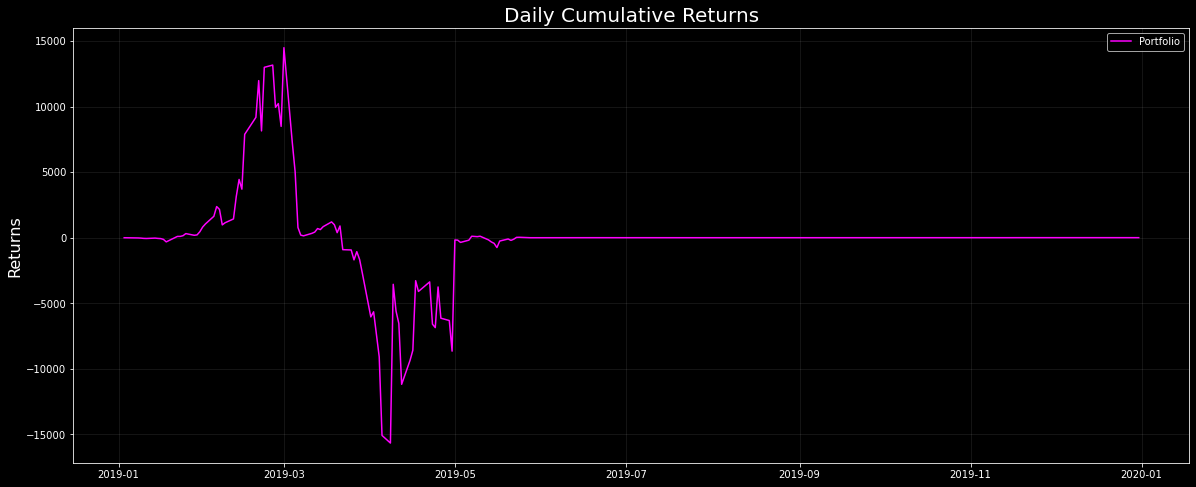

In [29]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.set_title("Daily Cumulative Returns", fontsize=s[1])
ax.set_ylabel("Returns", fontsize=s[2])
ax.plot(sp500_ew_daily_cumulative_return_df.index, sp500_ew_daily_cumulative_return_df.Portfolio,
        color=c[2], label="Portfolio")

ax.legend(loc='upper right')
ax.grid(alpha=ga)

#### Portfolio Covariance Matrix 

In [30]:
# Calculate the covariance matrix 
sp500_daily_returns_cov_matrix_df  = (sp500_daily_returns_df.cov())*252
sp500_daily_returns_cov_matrix_df

,F,AMCR,GE,FCX,NWSA,NWS,HBAN,NLOK,PBCT,HPE,...,SHW,ISRG,CMG,MTD,AZO,GOOG,GOOGL,AMZN,BKNG,NVR
F,0.075112,0.012507,0.039861,0.053705,0.024706,0.024105,0.022965,0.015530,0.026955,0.030301,...,0.013086,0.025067,0.004763,0.022308,0.007366,0.017719,0.017312,0.022713,0.017570,0.004196
AMCR,0.012507,0.051509,0.027033,0.027499,0.008049,0.008974,0.015425,0.008016,0.012863,0.017228,...,0.009398,0.012523,0.006438,0.016079,0.002682,0.008911,0.008927,0.009722,0.010081,0.004153
GE,0.039861,0.027033,0.162816,0.070136,0.018837,0.018058,0.032179,0.022912,0.033173,0.038603,...,0.029401,0.022353,0.007505,0.030230,0.009103,0.022033,0.021710,0.030819,0.023930,-0.005735
FCX,0.053705,0.027499,0.070136,0.178128,0.033966,0.034202,0.046003,0.024208,0.046370,0.049100,...,0.021524,0.036058,0.007846,0.041596,0.020400,0.038539,0.038069,0.037776,0.023320,-0.007116
NWSA,0.024706,0.008049,0.018837,0.033966,0.050746,0.047947,0.021062,0.011964,0.021257,0.025235,...,0.011195,0.020191,0.008125,0.020159,0.009969,0.018923,0.018475,0.021705,0.021989,0.003354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOOG,0.017719,0.008911,0.022033,0.038539,0.018923,0.018051,0.016787,0.028872,0.016225,0.025382,...,0.012838,0.025475,0.007530,0.021631,0.009189,0.058436,0.057220,0.033647,0.024133,0.001271
GOOGL,0.017312,0.008927,0.021710,0.038069,0.018475,0.017643,0.016223,0.028639,0.015629,0.025113,...,0.012699,0.025338,0.007999,0.021754,0.008882,0.057220,0.056328,0.033544,0.023982,0.001232
AMZN,0.022713,0.009722,0.030819,0.037776,0.021705,0.021256,0.015643,0.023364,0.013955,0.026326,...,0.016638,0.027629,0.018518,0.026028,0.010150,0.033647,0.033544,0.052122,0.022617,0.007957
BKNG,0.017570,0.010081,0.023930,0.023320,0.021989,0.020460,0.019125,0.021118,0.018615,0.026099,...,0.018052,0.023105,0.006393,0.018707,0.007168,0.024133,0.023982,0.022617,0.063184,0.009117


#### Portfolio Variance

In [31]:
# Calculate the portfolio variance
sp500_variance = np.dot(weights.T, np.dot(sp500_daily_returns_cov_matrix_df, weights))

# Print the result
print(str(np.round(sp500_variance_df, 4)))


NameError: name 'sp500_variance_df' is not defined

#### Portfolio Standard Deviation (volatility)

In [ ]:
# Calculate the standard deviation by taking the square root
sp500_std = np.sqrt(sp500_variance_df)

# Print the results 
print(str(np.round(sp500_std_df, 4)))


#### Annualize Return

In [ ]:
# Annualize return over 12 months
sp500_annualized_return_df  = ((1 + sp500_overall_cumulative_return_df) ** (12 /12)) - 1
print (sp500_annualized_return_df)

#### Annualized Volitility from STD with a frequency of 252  

In [ ]:

# Calculate annualized volatility from the standard deviation
sp500_annualized_volatility_df = sp500_daily_returns_df.std() * np.sqrt(252)
sp500_annualized_volatility_df.sum()

#### Portfolio Daily Returns Mean, STD

In [ ]:
sp500_ew_mean_daily_returns_df = sp500_ew_daily_returns_df.mean()
sp500_ew_std_daily_returns_df = sp500_ew_daily_returns_df.std()
print('Portfolio Daily Returns Mean: ')
print(sp500_ew_mean_daily_returns_df.Portfolio*100)
print('---------------------------------')
print('Portfolio Daily Returns STD: ')
print(sp500_ew_std_daily_returns_df.Portfolio*100)

#### Sharpe Ratio

In [ ]:
# risk-free rate
rfr = 0

# Calculate the Sharpe ratio 
sp500_ew_sharpe_ratio = (sp500_ew_mean_daily_returns_df - rfr) / sp500_ew_std_daily_returns_df
# Calculate the Annualized Sharpe ratio 
sp500_ew_annualized_sharpe_ratio = (252**0.5) * sp500_ew_sharpe_ratio
print('Portfolio Returns Sharpe : ')
print(sp500_ew_sharpe_ratio.Portfolio)
print('---------------------------------')
print('Portfolio Returns Annualized Sharpe: ')
print(sp500_ew_annualized_sharpe_ratio.Portfolio)

#### Portfolio Daily Returns, Skew, Kurtosis

In [ ]:
sp500_ew_skew_daily_returns_df = sp500_ew_daily_returns_df.skew()
sp500_ew_kurtosis_daily_returns_df = sp500_ew_daily_returns_df.kurtosis()

print('---------------------------------')
print('Portfolio Daily Returns Skew: ')
print(sp500_ew_skew_daily_returns_df.Portfolio)
print('---------------------------------')
print('Portfolio Daily Returns Kurtosis: ')
print(sp500_ew_kurtosis_daily_returns_df.Portfolio)

####  Plot Portfolio Daily Returns and a histogram Highlighting Mean, STD

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 16))
ax1.set_title(f"S&P 500 Stocks Daily Returns (EW Portfolio)", fontsize=s[1])
ax1.set_ylabel(f"Percentage of Change", fontsize=s[2])
ax1.plot(sp500_ew_daily_returns_df.index.values, sp500_ew_daily_returns_df.Portfolio*100, label='Portfolio', linewidth=w[3], color=c[2])

ax1.legend(loc='upper left')
ax1.grid(alpha=ga)

ax2.set_title(f"S&P 500 Stocks Daily Returns Distribution (EW Portfolio)", fontsize=s[1])
ax2.set_ylabel(f"Frequency", fontsize=s[2])
ax2.set_xlabel(f"Percentage of Change", fontsize=s[2])

ax2.hist(sp500_ew_daily_returns_df.Portfolio*100, bins=50, label='Portfolio', linewidth=w[3], color=c[1])

ax2.axvline(sp500_ew_mean_daily_returns_df.Portfolio*100, color='red', linestyle='dashed', linewidth=2)
#to plot the std line we plot both the positive and negative values 
ax2.axvline(sp500_ew_std_daily_returns_df.Portfolio*100, color='g', linestyle='dashed', linewidth=2)
ax2.axvline(-sp500_ew_std_daily_returns_df.Portfolio*100, color='g', linestyle='dashed', linewidth=2)

ax2.legend(loc='upper left', title = 'Tickers')
ax2.grid(alpha=ga)

plt.xticks(fontsize=s[3])
plt.yticks(fontsize=s[3])
plt.show()


In [ ]:
target = 0

# Create a negative, downside, return column with the negative returns only
sp500_ew_daily_negative_returns_df = sp500_ew_daily_returns_df.loc[sp500_ew_daily_returns_df.Portfolio < target]

# Calculate expected std dev of downside negative return
sp500_ew_std_daily_negative_returns_df = sp500_ew_daily_negative_returns_df.Portfolio.std()

# Calculate the sortino ratio
sp500_ew_sortino_ratio = (sp500_ew_mean_daily_returns_df - rfr)/sp500_ew_std_daily_negative_returns_df

# Print the results
print("Expected return  : ", sp500_ew_mean_daily_returns_df.Portfolio * 100)
print("Downside risk   : ", sp500_ew_std_daily_negative_returns_df * 100)
print("Sortino ratio : ", sp500_ew_sortino_ratio.Portfolio)
print("Sharpe ratio : ", sp500_ew_sharpe_ratio.Portfolio)


In [ ]:
# Calculate the max value 
roll_max = sp500_adj_close_df.rolling(center=False, min_periods=1, window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = sp500_adj_close_df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()





In [ ]:
def plot_daily_down(ticker):

    fig, ax1 = plt.subplots(1, figsize=(20, 16))
    ax1.set_title(f"S&P 500 Stocks ({ticker})", fontsize=s[1])
    ax1.set_ylabel(f"Price", fontsize=s[2])
    # Plot the results
    ax1.plot(sp500_adj_close_df.index.values, daily_draw_down[ticker], label='Daily drawdown')
    ax1.plot(sp500_adj_close_df.index.values, max_daily_draw_down[ticker], label='Maximum daily drawdown in time-window')

    ax1.legend(loc='upper right', title = 'Tickers')
    ax1.grid(alpha=ga)
    
    return 

interact(plot_daily_down, 
         ticker=sp500_adj_close_df);



### EDA with pyptopt

#### Expected Return with pyptopt

In [ ]:

sp500_ew_expected_returns_df_ = pypfopt.expected_returns.mean_historical_return(sp500_adj_close_df)
sp500_ew_expected_returns_df_

#### Portfolio Covariance Matrix with pyptopt

In [ ]:
sp500_simple_cov_df_ = pypfopt.risk_models.sample_cov(sp500_adj_close_df)

#### For Symbols to Weights for Portfolio

In [ ]:
weight_dict = {sym:w for sym, w in zip(sp500_adj_close_df.columns, weights)}

#### Build Efficient Frontier Object Class with pyptopt

In [ ]:
ef = pypfopt.efficient_frontier.EfficientFrontier(sp500_ew_expected_returns_df_, sp500_simple_cov_df_)

#### Set Efficient Frontier Portfolio Weights with pyptopt

In [ ]:
ef.set_weights(weight_dict)

#### Build Efficient Frontier Object Class with pyptopt

In [ ]:
sp500_ew_expected_returns_, sp500_std_, sp500_sharpe_ = ef.portfolio_performance()
print('Expected Return: ', sp500_ew_expected_returns_)
print('Volatility:\t ', sp500_std_)
print('Sharpe Ratio:\t ', sp500_ew_expected_returns_)